In [1]:
import pandas as pd
import numpy as np


#Note: please comment on transformation techniques I might beable to add
#I am leaving out data normalization since the type of normalization to apply can depend on the model which we determine later



df = pd.read_csv("bank-additional-full.csv", delimiter=";")


columns_in_order = df.columns

numeric_columns = [] 
categorical_columns = []


for col in df.columns:
    if(df[col].dtype==object):
        df[col] = df[col].astype('category')
        categorical_columns.append(col)
    else:   
        numeric_columns.append(col)



print(numeric_columns)
print(categorical_columns)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [36]:

categorical_df_encoded = pd.get_dummies(df[categorical_columns])
df_encoded = categorical_df_encoded

df_encoded[numeric_columns] = df[numeric_columns]

print(df_encoded.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',

In [3]:
from scipy.stats import skew
import math
import math
from scipy import stats

skewness = skew(df[numeric_columns])
print(skewness)

i =0
for item in skewness:
    if abs(item)<1:
        print("passes", numeric_columns[i])
    else:
        print("fails", numeric_columns[i])
    i+=1

print()

positive_columns = []
mixed_columns = []
for col in numeric_columns:
    if ((df[col] >= 0).all()):
        positive_columns.append(col)
    else:
        mixed_columns.append(col)


numerical_df = df[positive_columns].map(lambda x: np.log(x+1))
numerical_df[mixed_columns] = df[mixed_columns]
numerical_df = numerical_df[numeric_columns]

numerical_df["campaign"] = numerical_df["campaign"].map(lambda x: math.pow(x, 1/3))


new_skewness = skew(numerical_df)

print(new_skewness)

i =0
for item in new_skewness:
    if abs(item)<1:
        print("passes", numeric_columns[i])
    else:
        print("fails", numeric_columns[i])
    i+=1



[ 0.78466824  3.26302242  4.76233325 -4.92201066  3.83190268 -0.72406918
 -0.23087924  0.30316882 -0.70916213 -1.04422438]
passes age
fails duration
fails campaign
fails pdays
fails previous
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m
fails nr.employed

[ 0.14134008 -0.42131157  0.75489295 -5.00583935  2.58694598 -0.72406918
 -0.24116148  0.30316882 -0.79070133 -1.06362217]
passes age
passes duration
passes campaign
fails pdays
fails previous
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m
fails nr.employed


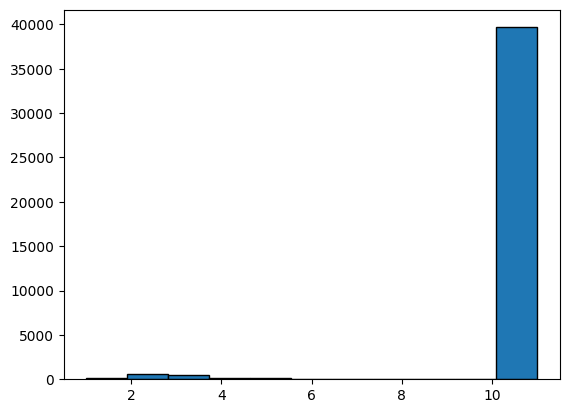

[0 1 2 3 4 5 6 7]
[0, 1, 2, 3, 4, 5, 6, 7]
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]
Index(['pdays_1', 'pdays_2', 'pdays_3', 'pdays_4', 'pdays_5', 'pdays_6',
       'pdays_7', 'pdays_8', 'pdays_9', 'pdays_10', 'pdays_11', 'previous'],
      dtype='object')


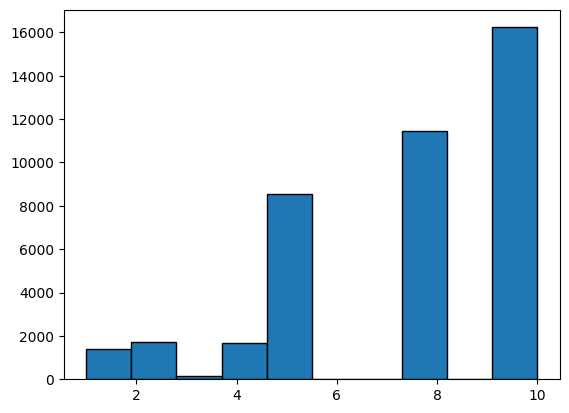

{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(10)}
Index(['pdays_1', 'pdays_2', 'pdays_3', 'pdays_4', 'pdays_5', 'pdays_6',
       'pdays_7', 'pdays_8', 'pdays_9', 'pdays_10', 'pdays_11', 'previous',
       'nr.employed'],
      dtype='object')


In [34]:
import matplotlib.pyplot as plt 

numerical_df = df[numeric_columns]

new_categorical_vars = pd.DataFrame()

# print(len(numerical_df["pdays"][numerical_df["pdays"]!=999]))
# print(len(numerical_df["pdays"][numerical_df["pdays"]==999]))
# print(len(numerical_df["pdays"]))


# The pdays feature is extremely abnormal due to many data points with the value of 999
# it is binned in a special way to avoid many bins with zero frequencies
# first the data is filtered for values that are not 999
# Then normal binning commences
# then the non filtered series is used to add the values of 999 with a corresponding bin value of 11
# this feature should be transformed into a onehot-encoded categorical variable since 
# the values between what the bins represent is non-linear since values with 999 is in the last bin.


filtered_pday = numerical_df["pdays"][numerical_df["pdays"]!=999]
bins = np.linspace(min(filtered_pday), max(filtered_pday), 10) 
binned = list(np.digitize(filtered_pday, bins))
old_nof_values = len(set(binned))
i =0
for item in list(numerical_df["pdays"]):
    if item == 999:
        binned.insert(i, np.int64(old_nof_values+1))
i+=1
plt.hist(binned, bins=len(bins)+1, edgecolor='black') 
plt.show()
new_categorical_vars = pd.get_dummies(pd.Categorical(binned), prefix='pdays')


# Convert previous to ordinal categorical variable due to extreme skewness
print(numerical_df["previous"].unique())
new_categorical_vars["previous"] = pd.Categorical(numerical_df["previous"], ordered=True)
print(new_categorical_vars["previous"].unique())
print(new_categorical_vars.columns)


# convert nr.employed to ordinal categorical variable with binning
# This is due to skewness that could not be solved in log and cube transformations
# Note: When outliers are removed
bins = np.linspace(min(numerical_df["nr.employed"]), max(numerical_df["nr.employed"]), 10) 
binned = list(np.digitize(numerical_df["nr.employed"], bins))
plt.hist(binned, bins=len(bins), edgecolor='black') 
plt.show()
print(set(binned))
col_names = []
new_categorical_vars["nr.employed"] = pd.Categorical(numerical_df["nr.employed"], ordered=True)


# Transform to onehot-encoded variables if necessary
# for i in range(10):
#     if(np.int64(i+1) in set(binned)):
#         col_names.append('nr.employed_'+ str(i+1))
# new_categorical_vars[col_names] = pd.get_dummies(pd.Categorical(binned), prefix='nr.employed')



print(new_categorical_vars.columns)